    Source | SS df MS Number of obs = 409435
    -------------+------------------------------ F( 1,409433) =49118.25
    Model | 22631.4793 1 22631.4793 Prob > F = 0.0000
    Residual | 188648.31 409433 .460755019 R-squared = 0.1071
    -------------+------------------------------ Adj R-squared = 0.1071
    Total | 211279.789 409434 .51602893 Root MSE = .67879
    -------------+----------------------------------------------------------
    | Robust Old Fashioned
    earnings | Coef. Std. Err. t Std. Err. t
    -------------+----------------------------------------------------------
    school | .0674387 .0003447 195.63 .0003043 221.63
    const. | 5.835761 .0045507 1282.39 .0040043 1457.38
    ------------------------------------------------------------------------

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy

df_40_to_49 = pd.read_stata(r'data\Dehejia_and_Wahba_1999\cps1re74.dta')
df_40_to_49 = df_40_to_49.loc[df_40_to_49['age'].isin(range(40,50))].loc[df_40_to_49['re78']>0].reset_index(drop=True)
df_40_to_49['earning'] = df_40_to_49['re78']
df_40_to_49['ln_earning'] = np.log(df_40_to_49['earning'])
df_40_to_49['school'] = df_40_to_49 ['ed']
df_40_to_49 = df_40_to_49[['earning', 'ln_earning', 'school','age']]
df_40_to_49

,earning,ln_earning,school,age
0,10804.320312,9.287702,12,40
1,5149.500977,8.546655,14,41
2,6551.591797,8.787463,4,48
3,20505.929688,9.928470,14,42
4,3094.156006,8.037271,8,46
...,...,...,...,...
2538,15746.650391,9.664383,8,41
2539,25564.669922,10.148967,14,45
2540,25564.669922,10.148967,10,48
2541,13671.929688,9.523100,9,47


In [2]:
y,X = patsy.dmatrices('ln_earning ~ school',data=df_40_to_49, return_type='dataframe')

result = sm.OLS(y,X).fit(cov_type='HC0')
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_earning   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.59
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000137
Time:                        12:16:40   Log-Likelihood:                -3139.8
No. Observations:                2543   AIC:                             6284.
Df Residuals:                    2541   BIC:                             6295.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4069      0.068    139.171      0.000       9.274       9.539
school         0.0230      0.006      3.819      0.000       0.011       0.035
==============================================================================
Omnibus:                     1661.494   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18547.215
Skew:                          -3.025   Prob(JB):                         0.00
Kurtosis:                      14.766   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### 6. OLS 해석

[statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html)

 * OBS  


In [55]:
result.nobs

2543.0


 * Wald test [res.wald_test()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.wald_test.html)  
 follows k DoF. Chi-squared distribution. (9.210 @ k=2, alpha=.99) [critical value table](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)

In [75]:
result.wald_test(['Intercept', 'school'], use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=346354.1039804812, p-value=0.0, df_denom=2>

In [62]:
from scipy.stats import chi2
chi2.ppf(.99,df=2)

9.21034037197618

 * Coeff   
 
|variable   | coef	  |  
|--         | --:      |
| Intercept	| 9.4069  |
| school	  | 0.0230  | 



In [50]:
result.params

Intercept    9.406906
school       0.022967
dtype: float64

 * t stat and SE
  
|variable   | std err	| t       | P>\|t\| |  
|--         | --:      | --:      | --: |
| Intercept	| 0.060   | 156.583 | 0.000 |
| school	  | 0.005   | 4.445   | 0.000 | 



In [51]:
result.bse

Intercept    0.067592
school       0.006013
dtype: float64

In [52]:
result.tvalues

Intercept    139.171202
school         3.819423
dtype: float64

In [53]:
result.pvalues

Intercept    0.000000
school       0.000134
dtype: float64

 * Confidence interval

  
|variable   | \[0.025	  | 0.975\]	  |  
|--         | --:      |--:      |
| Intercept	| 9.289  |9.4069  |
| school	  | 0.013  |0.033  | 



In [54]:
result.conf_int()

,0,1
Intercept,9.274427,9.539384
school,0.011181,0.034753


 * R-squared
 

In [56]:
result.rsquared_adj

0.007325428459439731

* consider an alternative specification - RMSE

In [62]:
result.mse_resid**.5

0.8320650657302663

OLS in matrix form.

In [113]:
mat_x = np.matrix(X)
mat_y = np.matrix(y)

xTx = mat_x.T * mat_x
xTx_inv = np.linalg.inv(xx)
xTy = mat_x.T * mat_y

beta_hat = xTx_inv * xTy
print('beta :',beta_hat, '\nbeta 0:',beta_hat[0], '\nbeta 1:',beta_hat[1])

beta : [[9.40690552]
 [0.02296705]] 
beta 0: [[9.40690552]] 
beta 1: [[0.02296705]]


C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\3455649620.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = pd.Series(result.params[0] + result.params[1] * school_means.index.values, index=school_means.index.values)


<Axes: xlabel='school'>

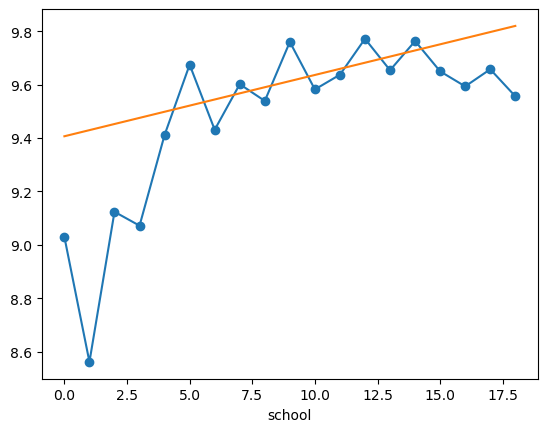

In [11]:
school_means = df_40_to_49.groupby('school')['ln_earning'].mean()
yhat = pd.Series(result.params[0] + result.params[1] * school_means.index.values, index=school_means.index.values)

import matplotlib.pyplot as plt

plt.figure()
school_means.plot(kind='line', x='school', y='ln wage', style='-o')
yhat.plot()

In [17]:
y,X = patsy.dmatrices('ln_earning ~ school + age + np.power(age,2)',data=df_40_to_49, return_type='dataframe')

model_2 = sm.OLS(y,X)
result_2 = model_2.fit(cov_type='HC0')
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_earning   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.843
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000565
Time:                        12:41:56   Log-Likelihood:                -3138.8
No. Observations:                2543   AIC:                             6286.
Df Residuals:                    2539   BIC:                             6309.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.0631      0.263     34.510      0.000       8.548       9.578
school               0.0235      0.006      3.918      0.000       0.012       0.035
age                  0.0076      0.006      1.342      0.180      -0.003       0.019
np.power(age, 2)    -0.0002      0.000     -0.939      0.348      -0.001       0.000
==============================================================================
Omnibus:                     1658.780   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18435.973
Skew:                          -3.020   Prob(JB):                         0.00
Kurtosis:                      14.727   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1101543827.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = pd.Series(result_2.params[0] + result_2.params[1] * school_means.index.values, index=school_means.index.values)


<Axes: xlabel='school'>

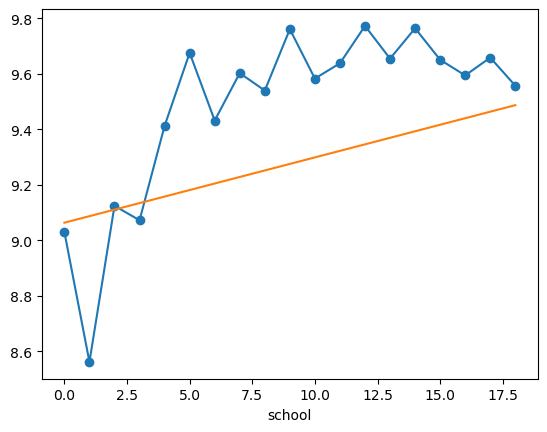

In [59]:
school_means = df_40_to_49.groupby('school')['ln_earning'].mean()
yhat = pd.Series(result_2.params[0] + result_2.params[1] * school_means.index.values, index=school_means.index.values)

import matplotlib.pyplot as plt

plt.figure()
school_means.plot(kind='line', x='school', y='ln wage', style='-o')
yhat.plot()

In [41]:
df_40_to_49['experience'] = df_40_to_49['age'] - df_40_to_49['school']
y,X = patsy.dmatrices('ln_earning ~ school + experience ',data=df_40_to_49, return_type='dataframe')

model_3 = sm.OLS(y,X)
result_3 = model_3.fit(cov_type='HC0')
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ln_earning   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.230
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           0.000274
Time:                        14:18:44   Log-Likelihood:                -3139.2
No. Observations:                2543   AIC:                             6284.
Df Residuals:                    2540   BIC:                             6302.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1073      0.258     35.241      0.000       8.601       9.614
school         0.0301      0.008      3.633      0.000       0.014       0.046
experience     0.0066      0.006      1.195      0.232      -0.004       0.017
==============================================================================
Omnibus:                     1659.354   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18445.660
Skew:                          -3.021   Prob(JB):                         0.00
Kurtosis:                      14.729   Cond. No.                         571.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1114850971.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = pd.Series(result_3.params[0] + result_3.params[1] * school_means.index.values, index=school_means.index.values)


<Axes: xlabel='school'>

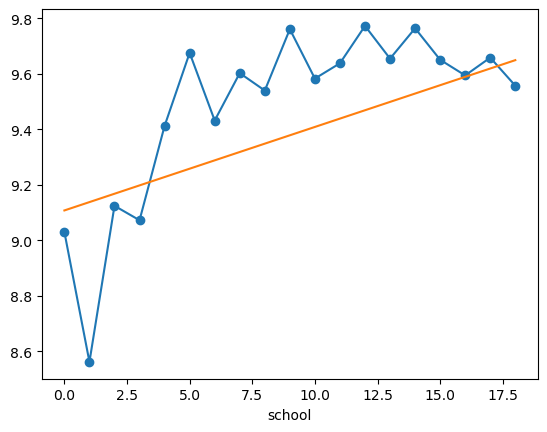

In [26]:
school_means = df_40_to_49.groupby('school')['ln_earning'].mean()
yhat = pd.Series(result_3.params[0] + result_3.params[1] * school_means.index.values, index=school_means.index.values)

import matplotlib.pyplot as plt

plt.figure()
school_means.plot(kind='line', x='school', y='ln wage', style='-o')
yhat.plot()

In [34]:
result_3.mse_model**.5

2.701854947826664

In [33]:
result.mse_model**.5

3.6985881186855756

In [68]:
def stats(ols_result):
    list_stats = []
    list_stats += [ols_result.nobs]
    list_stats += [ols_result.mse_resid**.5]
    list_stats += [ols_result.rsquared]
    list_stats += [ols_result.rsquared_adj]
    list_stats += [ols_result.df_resid]
    list_stats += [ols_result.params['school']]
    return list_stats

pd.DataFrame(
        {
        'model 1' : stats(result),
        'model 2' : stats(result_2),
        'model 3' : stats(result_3)
        },
             index=['obs','rmse','R2','Adj R2','DoF','b_school'])

,model 1,model 2,model 3
obs,2543.000000,2543.000000,2543.000000
rmse,0.832065,0.832044,0.832011
R2,0.007716,0.008546,0.008235
Adj R2,0.007325,0.007375,0.007454
DoF,2541.000000,2539.000000,2540.000000
b_school,0.022967,0.023526,0.030084


C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1876056179.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = pd.Series(result.params[0] + result.params[1] * school_means.index.values, index=school_means.index.values)
C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1876056179.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat_2 = pd.Series(result_2.params[0] + result_2.params[1] * school_means.index.values, index=school_means.index.values)
C:\Users\SeanJ\AppData\Local\Temp\ipykernel_5308\1876056179.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

<Axes: xlabel='school'>

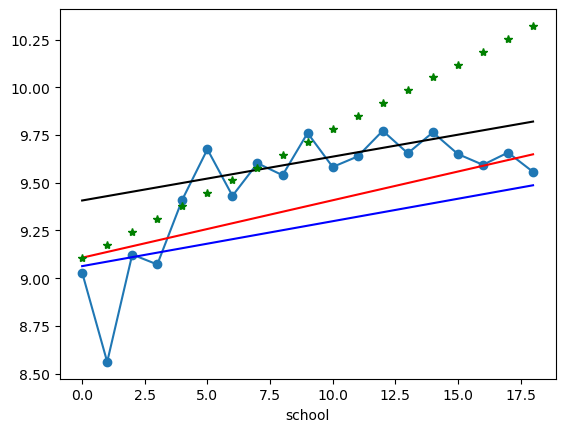

In [71]:
school_means = df_40_to_49.groupby('school')['ln_earning'].mean()
yhat = pd.Series(result.params[0] + result.params[1] * school_means.index.values, index=school_means.index.values)
yhat_2 = pd.Series(result_2.params[0] + result_2.params[1] * school_means.index.values, index=school_means.index.values)
yhat_3 = pd.Series(result_3.params[0] + result_3.params[1] * school_means.index.values, index=school_means.index.values)
# textbook 
y_textbook = pd.Series(result_3.params[0] + 0.0674387 * school_means.index.values, index=school_means.index.values)

import matplotlib.pyplot as plt

plt.figure()
school_means.plot(kind='line', x='school', y='ln wage', style='-o')
yhat.plot(c='k')
yhat_2.plot(c='b')
yhat_3.plot(c='r')
y_textbook.plot(c='g',style='*')

In [76]:
result.wald_test(['Intercept', 'school'], use_f=False, scalar=True)
result_2.wald_test(['Intercept', 'school'], use_f=False, scalar=True)


<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1383.31030321759, p-value=4.149390194713e-301, df_denom=2>

In [77]:
result_3.wald_test(['Intercept', 'school'], use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=5266.289531728599, p-value=0.0, df_denom=2>

In [78]:
result_3.wald_test(['Intercept', 'school','experience'], use_f=False, scalar=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=349345.49099017336, p-value=0.0, df_denom=3>